# Geo-Python 2020 заключительное упражнение
##### Заключительное упражнение в курсе Geo-Python включает в себя расчет и построение графиков сезонных погодных аномалий, чтобы увидеть, как температура менялась в разные сезоны за последние 100 с лишним лет. Мы будем использовать данные о погоде с метеостанции Соданкюля в Северной Финляндии.

### Цель

Задача-создать четырехпанельный график, показывающий сезонные температурные аномалии для зимы, весны, лета и осени за 1909-2019 годы. Шаблон для того, как должен выглядеть окончательный сюжет, можно найти ниже.

![](img/axes.png)


### Данные

[Файл данных](https://github.com/Geo-Python-2020/Final-exercise/blob/main/data/2315676.txt) с ежедневными данными о температуре в Соданкюле с января 1908 года по октябрь 2020 года. Эти данные были загружены из [базы данных глобальной исторической климатической сети NOAA](https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND) в виде текстового файла. Первые пять строк файла данных можно найти ниже, чтобы вы могли увидеть формат данных.

STATION          | STATION_NAME                                     |  DATE   |  TAVG  |   TMAX |    TMIN |    
-----------------| -------------------------------------------------| --------| -------| -------| -------- 
GHCND:FI000007501|                                   SODANKYLA-AWS-FI| 19080101| -9999 |   2    |    -37      
GHCND:FI000007501|                                   SODANKYLA-AWS-FI| 19080102| -9999 |   6    |    -26      
GHCND:FI000007501|                                   SODANKYLA-AWS-FI| 19080103| -9999 |   7    |    -27  

Температура здесь дана в градусах по Фаренгейту, и важные столбцы для вас следующие:

- Дата: дата в формате "YEARMODA", где "YEAR"-это год с использованием 4 цифр, " MO "- это двузначный месяц, а "DA" - это день месяца.
- ТАВГ: среднесуточная температура в градусах Фаренгейта
- ТМАКС: Максимальная дневная температура в градусах Фаренгейта
- TMIN: минимальная дневная температура в градусах Фаренгейта

Отсутствующие данные идентифицируются с -9999, и более подробную информацию об этих данных можно найти на веб-сайте NOAA.

#### Важное замечание о данных!
Вы заметите, что в столбце TAVG есть много пропущенных значений. Для дней, когда значения TAVG отсутствуют, вы можете рассчитать оценку среднесуточной температуры, усреднив значения TMAX и TMIN. Вы можете сделать это в новой колонке. Примечание. не заменяйте существующие значения TAVG своими оценками!

### Задача:

Для этого упражнения вы должны:

1. Прочитать в представленных данных файл с помощью Pandas и недостающие данные значения NA.

2. Заполните недостающие значения в столбце TAVG вашими оценками среднесуточной температуры, как указано выше в разделе данных. Затем вы можете понизить любую среднюю дневную температуру, которая все еще отсутствует.

3. Определите и используйте функцию для преобразования температуры в градусах Фаренгейта в градус Цельсия.

4. Рассчитайте сезонные средние температуры для каждого сезона в каждом году (например, зима 1909, Весна 1909, лето 1909, ...)

    Сезоны должны включать в себя следующие месяцы:
        
        Зима: Декабрь, Январь, Февраль
        Весна: Март, Апрель, Май
        Лето: Июнь, Июль, Август
        Осень: Сентябрь,…
        
1. Рассчитайте сезонные средние температуры за отчетный период 1951-1980 годов (например, всего 4 значения, по одному для каждого сезона)

1. Рассчитайте сезонные температурные аномалии для каждого года

1. Постройте график данных, как показано в приведенном выше примере

Обратите внимание, что мы также надеемся увидеть, как вы используете ячейки Markdown для объяснения анализа данных и комментарии кода там, где это необходимо, чтобы объяснить, что делает ваш код.

## Решение

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)

In [3]:
# Для колонок:
pd.set_option('display.max_columns', None)
# Для строк:
pd.set_option('display.max_rows', 10)

In [4]:
# Чтение данных
fd = os.path.join(ROOT_PATH, "data/2315676.txt")
df = pd.read_csv(fd, delim_whitespace=True, skiprows=[1], na_values=-9999)
# df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41065 entries, 0 to 41064
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION       41065 non-null  object 
 1   STATION_NAME  41065 non-null  object 
 2   DATE          41065 non-null  int64  
 3   TAVG          21222 non-null  float64
 4   TMAX          40296 non-null  float64
 5   TMIN          39119 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.9+ MB


In [6]:
print(f"Количество строк в выборке: {len(df)}")
print("Количество отсутствующих данных 'TAVG': ", df["TAVG"].isna().sum())
print("Количество отсутствующих данных 'TAVG': ", df["TMAX"].isna().sum())
print("Количество отсутствующих данных 'TAVG': ", df["TMIN"].isna().sum())

Количество строк в выборке: 41065
Количество отсутствующих данных 'TAVG':  19843
Количество отсутствующих данных 'TAVG':  769
Количество отсутствующих данных 'TAVG':  1946


In [7]:
# датафрейм за отчетный период 1951-1980 годов
start_time = 19501201
stop_time = 19801130
df = df[(df.DATE >= start_time) & (df.DATE <= stop_time)]
df

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
15592,GHCND:FI000007501,SODANKYLA-AWS-FI,19501201,NaN,-12.0,-25.0
15593,GHCND:FI000007501,SODANKYLA-AWS-FI,19501202,NaN,23.0,-13.0
15594,GHCND:FI000007501,SODANKYLA-AWS-FI,19501203,NaN,23.0,19.0
15595,GHCND:FI000007501,SODANKYLA-AWS-FI,19501204,NaN,23.0,17.0
15596,GHCND:FI000007501,SODANKYLA-AWS-FI,19501205,NaN,27.0,20.0
...,...,...,...,...,...,...
26544,GHCND:FI000007501,SODANKYLA-AWS-FI,19801126,19.0,22.0,15.0
26545,GHCND:FI000007501,SODANKYLA-AWS-FI,19801127,9.0,15.0,11.0
26546,GHCND:FI000007501,SODANKYLA-AWS-FI,19801128,-23.0,-19.0,-28.0
26547,GHCND:FI000007501,SODANKYLA-AWS-FI,19801129,-18.0,-14.0,-25.0


#### Очистка и восстановление данных

In [8]:
# вычислим "TAVG" из "TMAX" и "TMIN"
df["TAVG"][df["TAVG"].isna()] = df["TMIN"] + ((df["TMAX"] - df["TMIN"])/2)

In [9]:
# df.dropna(subset=["TMIN", "TMAX"], inplace=True)
# df
# df[df["TAVG"].isna()]
# print(df)
# print(df[df["TAVG"].isna()])
# print(df[df["TAVG"].isna()].info())


In [10]:
print(f"Количество строк в выборке: {len(df)}")
print("Количество отсутствующих данных 'TAVG': ", df["TAVG"].isna().sum())
print("Количество отсутствующих данных 'TAVG': ", df["TMAX"].isna().sum())
print("Количество отсутствующих данных 'TAVG': ", df["TMIN"].isna().sum())

Количество строк в выборке: 10957
Количество отсутствующих данных 'TAVG':  1
Количество отсутствующих данных 'TAVG':  11
Количество отсутствующих данных 'TAVG':  8


In [11]:
# Удалим строки с данными неподлежащими восстановлению по колонке "TAVG"
df.dropna(subset=["TAVG"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10956 entries, 15592 to 26548
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION       10956 non-null  object 
 1   STATION_NAME  10956 non-null  object 
 2   DATE          10956 non-null  int64  
 3   TAVG          10956 non-null  float64
 4   TMAX          10945 non-null  float64
 5   TMIN          10949 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 599.2+ KB


In [12]:
# перевод в цельсии
df["TAVG_C"] = (df["TAVG"] - 32.0) / 1.8

In [13]:
# создадим колонку "YEAR" из "DATE"
df['YEAR'] = pd.to_datetime(df["DATE"].astype(str)).dt.year
# создадим колонку "MONTH" из "DATE"
df['MONTH'] = pd.to_datetime(df["DATE"].astype(str)).dt.month

df.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,TAVG_C,YEAR,MONTH
15592,GHCND:FI000007501,SODANKYLA-AWS-FI,19501201,-18.5,-12.0,-25.0,-28.055556,1950,12
15593,GHCND:FI000007501,SODANKYLA-AWS-FI,19501202,5.0,23.0,-13.0,-15.000000,1950,12
15594,GHCND:FI000007501,SODANKYLA-AWS-FI,19501203,21.0,23.0,19.0,-6.111111,1950,12
15595,GHCND:FI000007501,SODANKYLA-AWS-FI,19501204,20.0,23.0,17.0,-6.666667,1950,12
15596,GHCND:FI000007501,SODANKYLA-AWS-FI,19501205,23.5,27.0,20.0,-4.722222,1950,12


# ПРОВЕРКА

In [14]:
winter = df[(df.MONTH == 1) | (df.MONTH == 2) | (df.MONTH == 12)].sort_values("MONTH")
winter_group = winter.groupby(["YEAR"])

In [15]:
print(len(winter_group))

31


In [16]:
winter_group["YEAR"].nunique()

YEAR
1950    1
1951    1
1952    1
1953    1
1954    1
       ..
1976    1
1977    1
1978    1
1979    1
1980    1
Name: YEAR, Length: 31, dtype: int64

In [17]:
# Проверьте "имена" каждой группы 
winter_group.groups.keys()

dict_keys([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980])

In [18]:
winter_group.groups.get(1908)

In [19]:
# Перебираем года - сезон ЗИМА
for key, group in winter_group:
    # Print key и group
    print("Key:\n", key) # год и месяц Н-р: (1908)
    print("\n Первая строка данных в этой группе:\n", group.head())
    print(len(group))
    print(type(group))
    # остановить итерацию с помощью команды break
    break

Key:
 1950

 Первая строка данных в этой группе:
                  STATION      STATION_NAME      DATE  TAVG  TMAX  TMIN  \
15597  GHCND:FI000007501  SODANKYLA-AWS-FI  19501206  20.5  23.0  18.0   
15598  GHCND:FI000007501  SODANKYLA-AWS-FI  19501207  18.5  21.0  16.0   
15599  GHCND:FI000007501  SODANKYLA-AWS-FI  19501208  15.5  18.0  13.0   
15600  GHCND:FI000007501  SODANKYLA-AWS-FI  19501209  17.5  25.0  10.0   
15601  GHCND:FI000007501  SODANKYLA-AWS-FI  19501210  13.5  28.0  -1.0   

          TAVG_C  YEAR  MONTH  
15597  -6.388889  1950     12  
15598  -7.500000  1950     12  
15599  -9.166667  1950     12  
15600  -8.055556  1950     12  
15601 -10.277778  1950     12  
31
<class 'pandas.core.frame.DataFrame'>


In [20]:
# столбцы, которые мы хотим агрегировать
mean_cols = ['TAVG', 'TAVG_C']

# Создайте пустой фрейм данных для агрегированных значений
winter_data = pd.DataFrame([], columns=mean_cols)
winter_data

,TAVG,TAVG_C


In [21]:
# перебираем группы
for key, group in winter_group:
    # вычисляем среднее значение
    mean_values = group[mean_cols].mean()
#     print(mean_values.dtype)
    # добавьте ключ (т. е. информацию о дате и времени) в агрегированные значения
    mean_values['YEAR'] = key
#     print(key)
    # добавьте агрегированные значения в фрейм данных monthly_data
    winter_data = winter_data.append(mean_values, ignore_index=True)
#     if key == 5:
#         break

winter_data.head

<bound method NDFrame.head of          TAVG     TAVG_C    YEAR
0   16.000000  -8.888889  1950.0
1    6.972222 -13.904321  1951.0
2   13.527473 -10.262515  1952.0
3   12.194444 -11.003086  1953.0
4   13.611111 -10.216049  1954.0
..        ...        ...     ...
26   6.230769 -14.316239  1976.0
27   7.788889 -13.450617  1977.0
28   0.655556 -17.413580  1978.0
29   5.944444 -14.475309  1979.0
30   1.133333 -17.148148  1980.0

[31 rows x 3 columns]>

<AxesSubplot:xlabel='YEAR'>

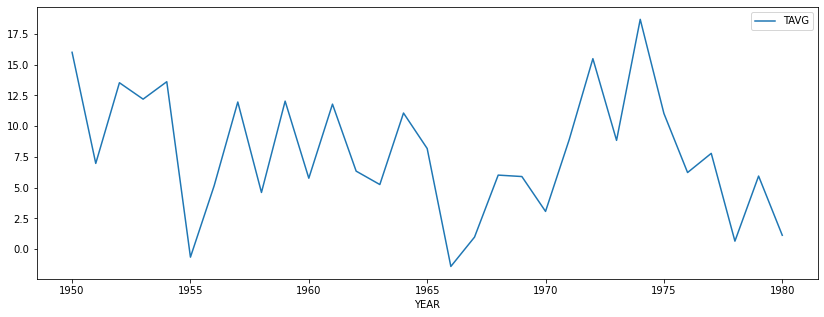

In [22]:
winter_data.plot.line(x='YEAR', y='TAVG', figsize=(14,5))

# Подготовка данных по сезонам

In [56]:
# столбцы, которые мы хотим агрегировать
mean_cols = ['TAVG', 'TAVG_C']

In [57]:
# Зима
winter = df[(df.MONTH == 1) | (df.MONTH == 2) | (df.MONTH == 12)].sort_values("MONTH")
winter_group = winter.groupby(["YEAR"])

# Создайте пустой фрейм данных для агрегированных значений
winter_data = pd.DataFrame([], columns=mean_cols)

for key, group in winter_group:
    # вычисляем среднее значение
    mean_values = group[mean_cols].mean()
    # добавьте ключ (т. е. информацию о годе) в агрегированные значения
    mean_values['YEAR'] = key
    # добавьте агрегированные значения в фрейм данных
    winter_data = winter_data.append(mean_values, ignore_index=True)

In [58]:
winter_temps.describe()

count    31.000000
mean    -13.421097
std       2.812145
min     -18.555556
25%     -14.887804
50%     -13.904321
75%     -11.180556
max      -7.401235
Name: TAVG_C, dtype: float64

In [59]:
# средние температуры
winter_temps = winter_data.TAVG_C

# минимум и максимум
winter_min_temp = winter_data.TAVG_C.min()
winter_min_year = winter_data['YEAR'][winter_data.TAVG_C == winter_min_temp]
winter_max_temp = winter_data.TAVG_C.max()
winter_max_year = winter_data['YEAR'][winter_data.TAVG_C == winter_max_temp]

<AxesSubplot:xlabel='YEAR'>

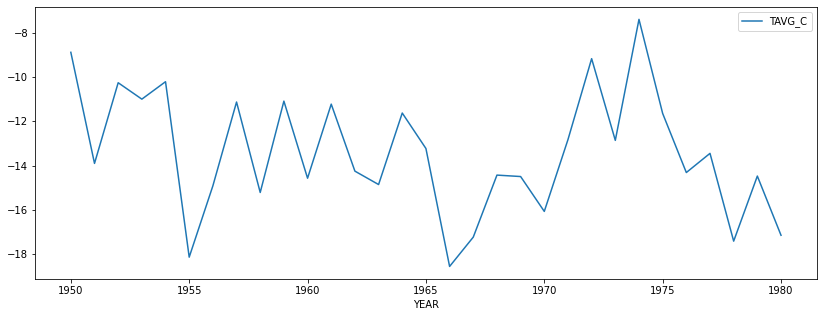

In [60]:
winter_data.plot.line(x='YEAR', y='TAVG_C', figsize=(14,5))

In [61]:
# Весна
spring = df[(df.MONTH >= 3) & (df.MONTH <= 5)].sort_values("MONTH")
spring_group = spring.groupby(["YEAR"])
# spring_temps = spring["TAVG_C"]

# Создайте пустой фрейм данных для агрегированных значений
spring_data = pd.DataFrame([], columns=mean_cols)

for key, group in spring_group:
    # вычисляем среднее значение
    mean_values = group[mean_cols].mean()
    # добавьте ключ (т. е. информацию о годе) в агрегированные значения
    mean_values['YEAR'] = key
    # добавьте агрегированные значения в фрейм данных
    spring_data = spring_data.append(mean_values, ignore_index=True)

In [62]:
spring_data.describe()

,TAVG,TAVG_C,YEAR
count,30.000000,30.000000,30.000000
mean,27.790671,-2.338516,1965.500000
std,3.131911,1.739951,8.803408
min,21.869565,-5.628019,1951.000000
25%,25.853948,-3.414474,1958.250000
50%,27.997283,-2.223732,1965.500000
75%,29.927989,-1.151117,1972.750000
max,33.722826,0.957126,1980.000000


In [63]:
# средние температуры
spring_temps = spring_data.TAVG_C

# минимум и максимум
spring_min_temp = spring_data.TAVG_C.min()
spring_min_year = spring_data['YEAR'][spring_data.TAVG_C == spring_min_temp]
spring_max_temp = spring_data.TAVG_C.max()
spring_max_year = spring_data['YEAR'][spring_data.TAVG_C == spring_max_temp]

<AxesSubplot:xlabel='YEAR'>

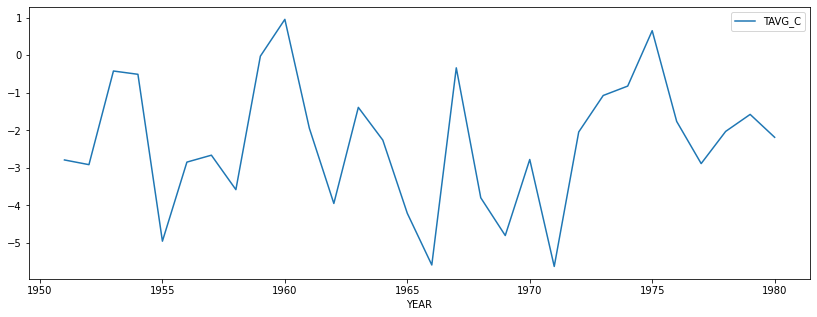

In [64]:
spring_data.plot.line(x='YEAR', y='TAVG_C', figsize=(14,5))

In [65]:
# Лето
summer = df[(df.MONTH >= 6) & (df.MONTH <= 8)].sort_values("MONTH")
summer_group = summer.groupby(["YEAR"])


# Создайте пустой фрейм данных для агрегированных значений
summer_data = pd.DataFrame([], columns=mean_cols)

for key, group in summer_group:
    # вычисляем среднее значение
    mean_values = group[mean_cols].mean()
    # добавьте ключ (т. е. информацию о годе) в агрегированные значения
    mean_values['YEAR'] = key
    # добавьте агрегированные значения в фрейм данных
    summer_data = summer_data.append(mean_values, ignore_index=True)

In [66]:
# средние температуры
summer_temps = summer_data.TAVG_C

# минимум и максимум
summer_min_temp = summer_data.TAVG_C.min()
summer_min_year = summer_data['YEAR'][summer_data.TAVG_C == summer_min_temp]
summer_max_temp = summer_data.TAVG_C.max()
summer_max_year = summer_data['YEAR'][summer_data.TAVG_C == summer_max_temp]

In [67]:
summer_temps.describe()

count    30.000000
mean     12.400262
std       1.175527
min      10.187198
25%      11.632699
50%      12.128623
75%      13.309179
max      14.547101
Name: TAVG_C, dtype: float64

<AxesSubplot:xlabel='YEAR'>

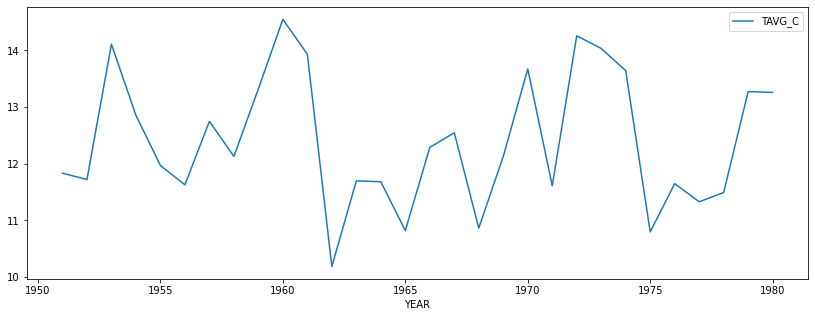

In [68]:
summer_data.plot.line(x='YEAR', y='TAVG_C', figsize=(14,5))

In [69]:
# Осень
autumn = df[(df.MONTH >= 9) & (df.MONTH <= 11)].sort_values("MONTH")
autumn_group = autumn.groupby(["YEAR"])
autumn_temps = autumn["TAVG_C"]

# Создайте пустой фрейм данных для агрегированных значений
autumn_data = pd.DataFrame([], columns=mean_cols)

for key, group in autumn_group:
    # вычисляем среднее значение
    mean_values = group[mean_cols].mean()
    # добавьте ключ (т. е. информацию о годе) в агрегированные значения
    mean_values['YEAR'] = key
    # добавьте агрегированные значения в фрейм данных
    autumn_data = autumn_data.append(mean_values, ignore_index=True)

In [70]:
autumn_temps.describe()

count    2729.000000
mean       -0.814910
std         7.986282
min       -37.222222
25%        -4.444444
50%         0.555556
75%         4.722222
max        18.333333
Name: TAVG_C, dtype: float64

In [71]:
autumn_data.describe()

,TAVG,TAVG_C,YEAR
count,30.000000,30.000000,30.000000
mean,30.531182,-0.816010,1965.500000
std,3.410759,1.894866,8.803408
min,24.527473,-4.151404,1951.000000
25%,28.108516,-2.161935,1958.250000
50%,30.277473,-0.956960,1965.500000
75%,33.189560,0.660867,1972.750000
max,37.840659,3.244811,1980.000000


In [72]:
# средние температуры
autumn_temps = autumn_data.TAVG_C

# минимум и максимум
autumn_min_temp = autumn_data.TAVG_C.min()
autumn_min_year = autumn_data['YEAR'][autumn_data.TAVG_C == autumn_min_temp]
autumn_max_temp = autumn_data.TAVG_C.max()
autumn_max_year = autumn_data['YEAR'][autumn_data.TAVG_C == autumn_max_temp]

<AxesSubplot:xlabel='YEAR'>

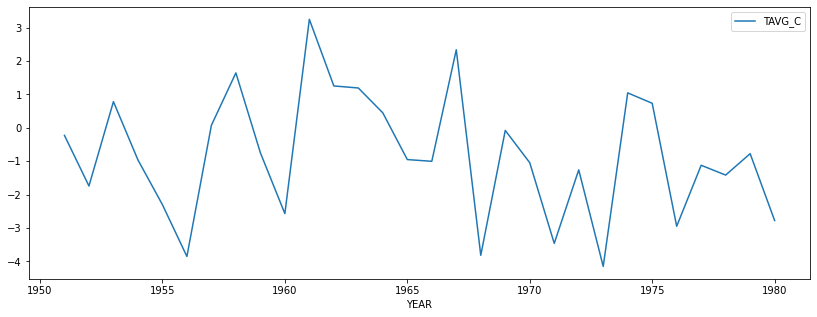

In [73]:
autumn_data.plot.line(x='YEAR', y='TAVG_C', figsize=(14,5))

In [84]:
# Единая шкала измерений

# Найти нижний предел для оси y
temp_min = min(winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min()) - 2
print(temp_min)

# найти верхний предел для оси y
temp_max = max(winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max()) + 2
print(temp_max)

-20.555555555555557
16.547101449275367


Text(1973.0, -4.15140415140415, ' <- МИНИМУМ')

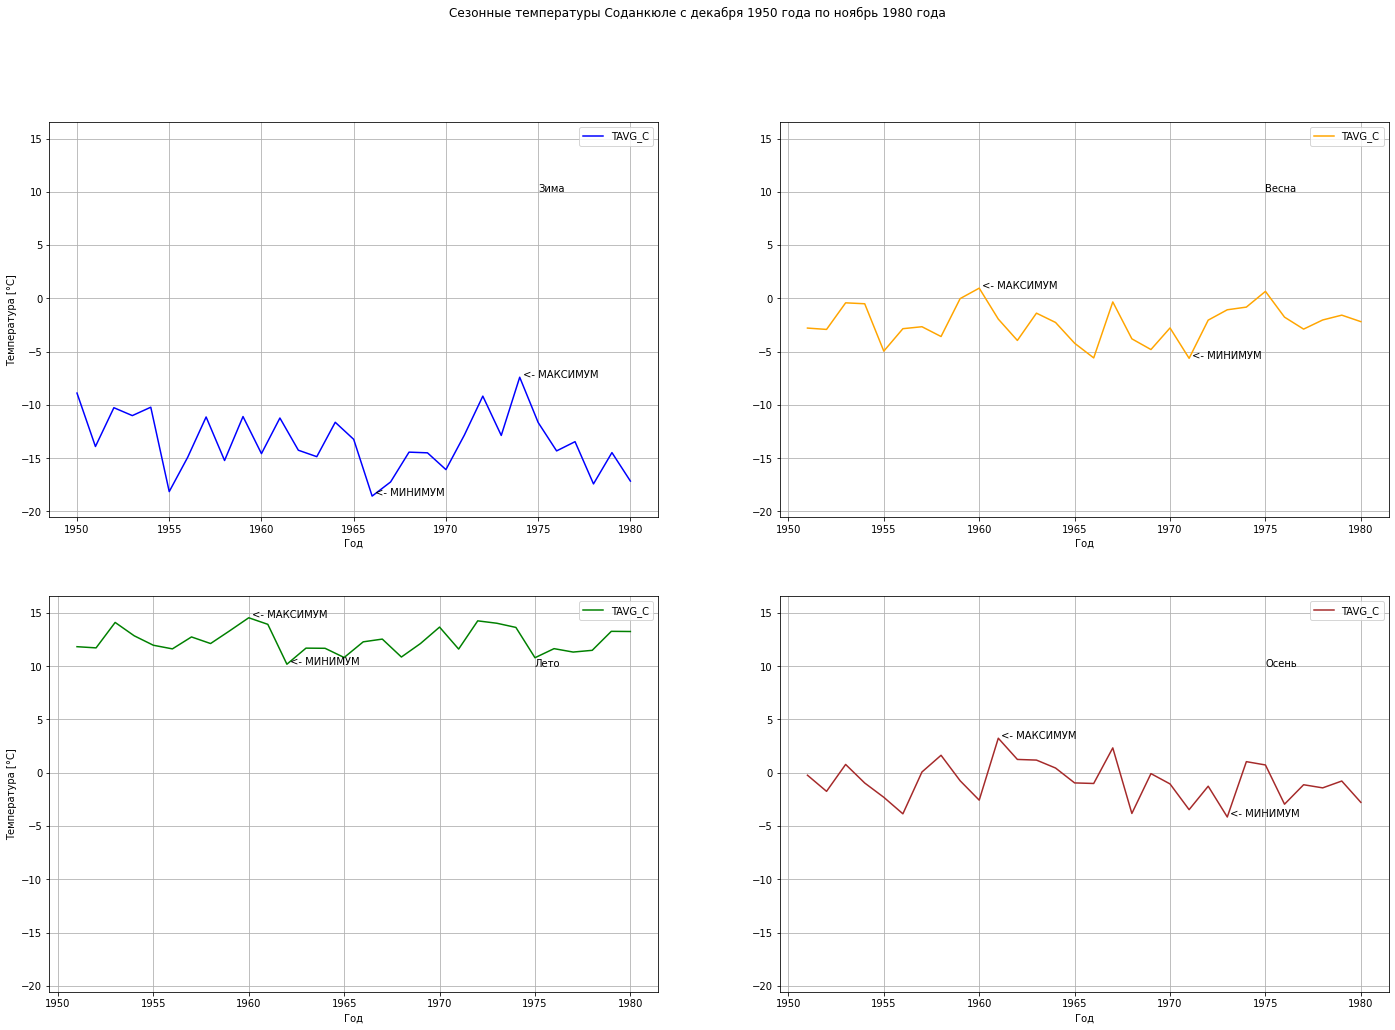

In [85]:
# графики
fig = plt.figure(figsize=(24,16))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# название графиков
fig.suptitle("Сезонные температуры Соданкюле с декабря 1950 года по ноябрь 1980 года")

# ширина линии
line_width = 1.5

# графики по данным с сеткой
winter_data.plot(ax=ax1, x='YEAR', y='TAVG_C', c='blue', lw=line_width, ylim=[temp_min, temp_max], grid=True)
spring_data.plot(ax=ax2, x='YEAR', y='TAVG_C', c='orange', lw=line_width, ylim=[temp_min, temp_max], grid=True)
summer_data.plot(ax=ax3, x='YEAR', y='TAVG_C', c='green', lw=line_width, ylim=[temp_min, temp_max], grid=True)
autumn_data.plot(ax=ax4, x='YEAR', y='TAVG_C', c='brown', lw=line_width, ylim=[temp_min, temp_max], grid=True)

# метки по осям
ax1.set_xlabel("Год")
ax2.set_xlabel("Год")
ax3.set_xlabel("Год")
ax4.set_xlabel("Год")
ax1.set_ylabel("Температура [°C]")
ax3.set_ylabel("Температура [°C]")

# метки на графике с названием сезона (1975 - метка по оси X; 10 - метка по оси Y)
ax1.text(1975, 10, 'Зима')
ax2.text(1975, 10, 'Весна')
ax3.text(1975, 10, 'Лето')
ax4.text(1975, 10, 'Осень')

#
ax1.text(winter_max_year.values[0], winter_max_temp, " <- МАКСИМУМ")
ax1.text(winter_min_year.values[0], winter_min_temp, " <- МИНИМУМ")
ax2.text(spring_max_year.values[0], spring_max_temp, " <- МАКСИМУМ")
ax2.text(spring_min_year.values[0], spring_min_temp, " <- МИНИМУМ")
ax3.text(summer_max_year.values[0], summer_max_temp, " <- МАКСИМУМ")
ax3.text(summer_min_year.values[0], summer_min_temp, " <- МИНИМУМ")
ax4.text(autumn_max_year.values[0], autumn_max_temp, " <- МАКСИМУМ")
ax4.text(autumn_min_year.values[0], autumn_min_temp, " <- МИНИМУМ")